# Overview

This note records the replication and extension of Romer and Romer (2004).

# Replication

In [1]:
#%% Import Moduels

## System Tools
import os
import numpy as np
## I/O Tools
import _pickle as pickle
## Data Process Tools
import pandas as pd
import datetime
## Graphs
import matplotlib.pyplot as plt
import matplotlib.backends.backend_pdf as figpdf
## Statistical Tools
import statsmodels.api as sm
## Database API
from fredapi import Fred


# End of Section: Import Moduels
###############################################################################


#%% Setup Work Directory

## Office Desktop Directory
#os.chdir("E:\\Dropbox")
## Home Desktop Directory
os.chdir("L:\Dropbox")
## Laptop Directory
#os.chdir("/Users/xingguo/Dropbox/")

##Windows System Path
os.chdir("Research Projects\\EquityMarkets_MonetaryPolicy\\Data\\Macro_data\\codes")
##Mac System Path
#os.chdir("Research Projects/OttonelloGuo/Response2MonetaryShock/Monthly")

# End of Section: Setup Work Directory
###############################################################################

#%% Import Self-written Functions

## NBER data plot
exec(open('Fun_RomerRomerReg.py').read())
exec(open('Fun_IRF_Plot.py').read())
# End of Section: Import Self-written Functions
###############################################################################


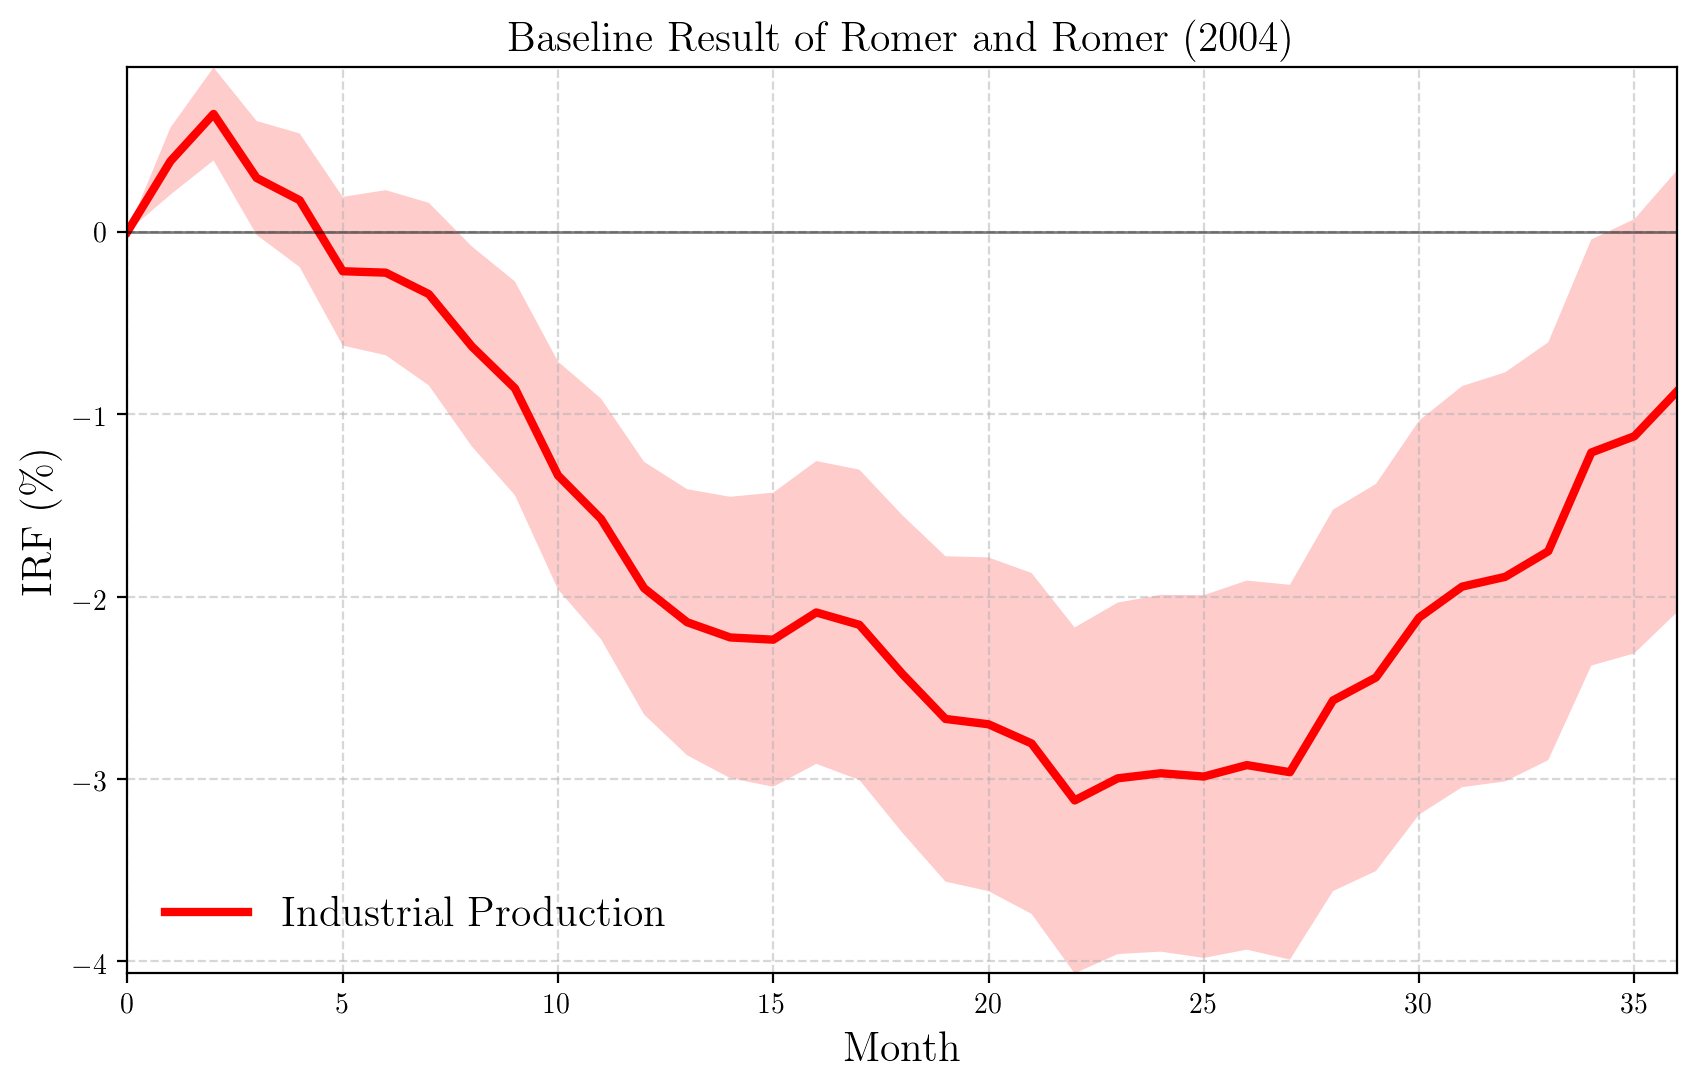

In [3]:
#%% Baseline Romer and Romer Result-Monthly Result

### Construct the Data Set for Regression
try:
    ## Load in the Saved Data Set
    Sample       =   pickle.load(open("..\\temp\\RomerRomer_Monthly.p",'rb'))
except:
    ## Re-Construct the Data Set
    # Download/Read-in PPI data from FRED
    fred        =   Fred(api_key='86cde3dec5dda5ffca44b58f01838b1e')
    IndProd     =   fred.get_series('IPB50001N')
    IndProd     =   pd.DataFrame(IndProd,columns={'IndProd'})
    # Monthly Monetary Shock Data from Wieland
    RRShock     =   pd.read_stata("..\\datasets\\MonetaryShocks_FromWieland"+
                                  "\\RR_monetary_shock_monthly.dta")
    RRShock.set_index('date',inplace=True)
    # Sample for Regression 
    Sample      =   RRShock.merge(right=IndProd,how='outer', \
                                  left_index=True,right_index=True)
    Sample.sort_index(inplace=True)
    
    # Set Monetary Shocks before March, 1969 to 0
    Sample.loc[Sample.index<datetime.datetime(1969,3,1), \
               ['resid','resid_romer','resid_full']]    =   0
    # Generate Year and Month ID
    Sample['Year']          =   Sample.index.map(lambda x: x.year) 
    Sample['Month']         =   Sample.index.map(lambda x: x.month)
    # Save the Data
    pickle.dump(Sample,open("..\\temp\\RomerRomer_Monthly.p",'wb'))

### Generate the Romer & Romer (2004) Result
## Setup
LagMin_Shock    =   1
LagNum_Shock    =   36

LagNum_Res      =   24

StartEndDate    =   [datetime.datetime(1970,1,1),datetime.datetime(1996,12,31)]
## Regression
IRF,STD,RegResult   =   RomerRomerReg(Sample, \
                                      'IndProd','resid_romer','Month', \
                                      LagNum_Res,LagNum_Shock,LagMin_Shock, \
                                      StartEndIndex=StartEndDate, \
                                      ResType='Log-Diff',IRFType='Accumulated')
IRF.loc[0,:]        =   0
IRF.sort_index(inplace=True)
STD.loc[0,:]        =   0
STD.sort_index(inplace=True)
## Generate the IRF Plots
IRF_Plot(IRF*100,STD*100,['IndProd'],['Industrial Production'], \
         ['solid'],['red'], \
         FileName='..\\results\\RomerRomer2004\\RR2004_Monthly.pdf', \
         Title='Baseline Result of Romer and Romer (2004)', \
         XLabel='Month',YLabel='IRF (\%)')

The result is very close to the original result in Romer and Romer (2004).

# Extension: Response of Industrial Production

## Quarterly Data

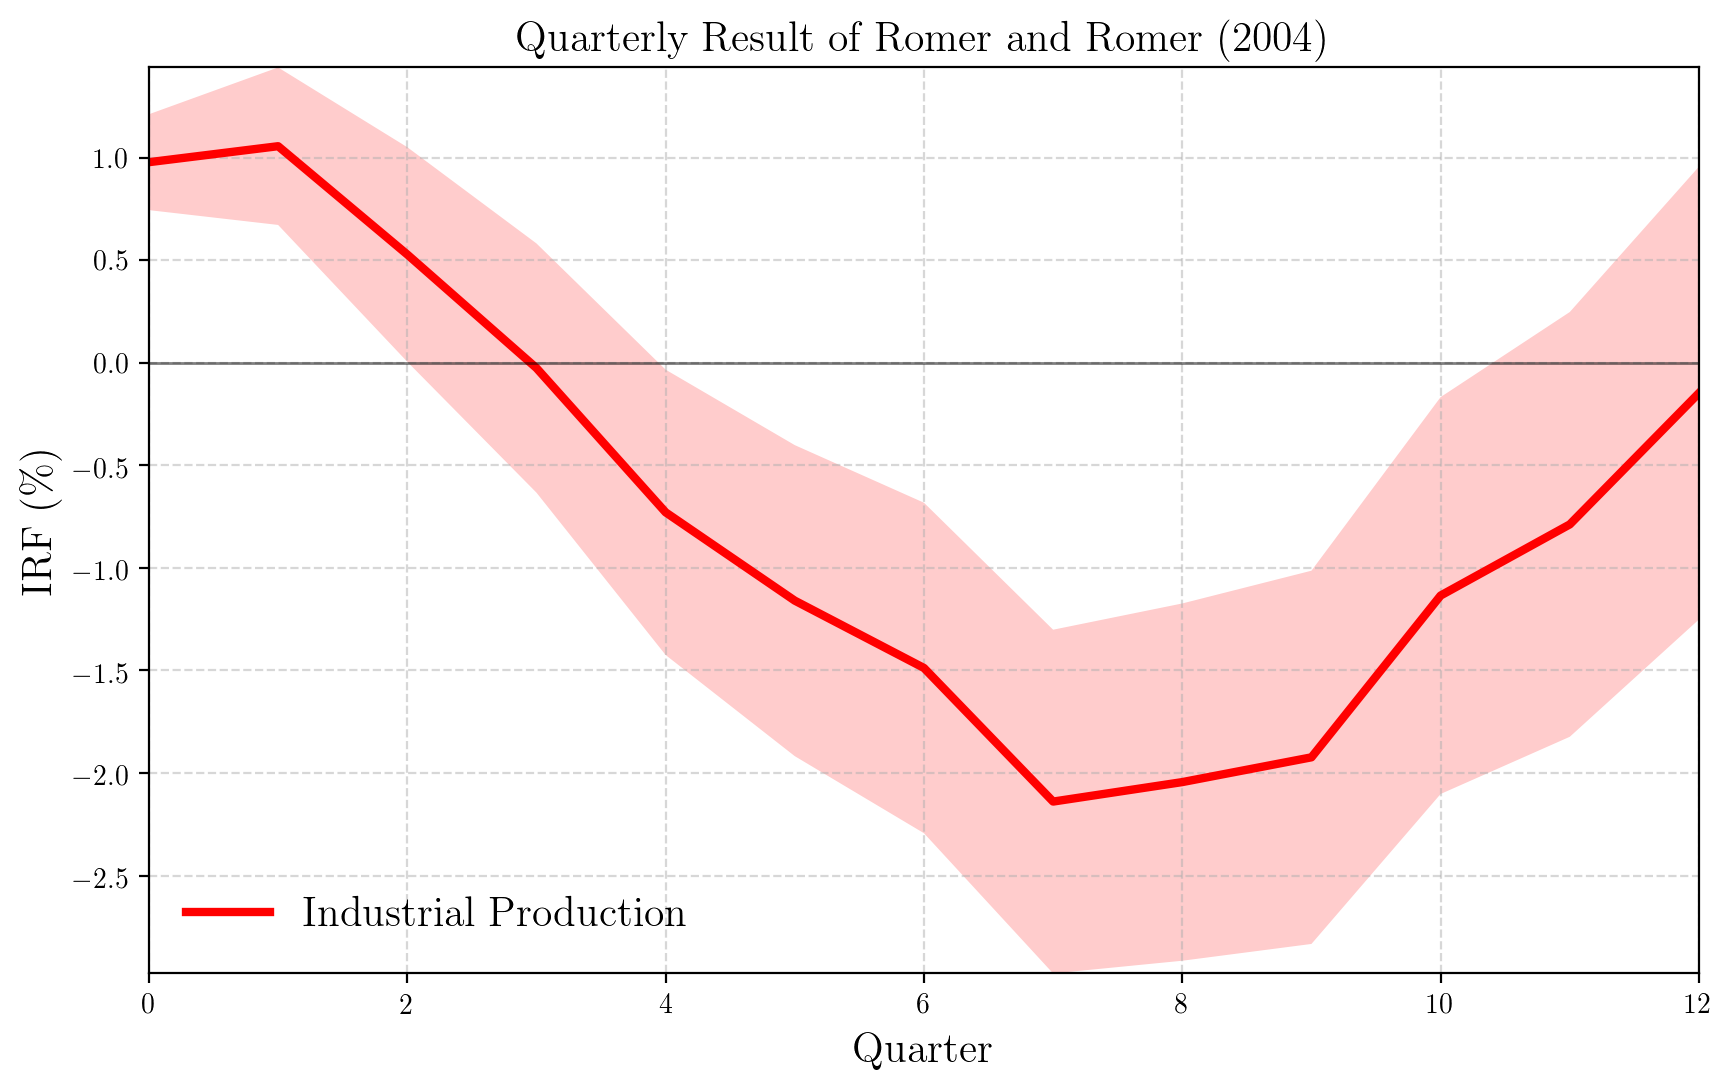

In [2]:
#%% Baseline Romer and Romer Result-Quarterly Result

### Construct the Data Set for Regression
try:
    ## Load in the Saved Data Set
    Sample       =   pickle.load(open("..\\temp\\RomerRomer_Quarterly.p",'rb'))
except:
    ## Re-Construct the Data Set
    # Download/Read-in PPI data from FRED
    fred        =   Fred(api_key='86cde3dec5dda5ffca44b58f01838b1e')
    IndProd     =   fred.get_series('IPB50001NQ')
    IndProd     =   pd.DataFrame(IndProd,columns={'IndProd'})
    # Monthly Monetary Shock Data from Wieland
    RRShock     =   pd.read_stata("..\\datasets\\MonetaryShocks_FromWieland"+
                                  "\\RR_monetary_shock_quarterly.dta")
    RRShock.set_index('date',inplace=True)
    # Sample for Regression 
    Sample      =   RRShock.merge(right=IndProd,how='outer', \
                                  left_index=True,right_index=True)
    Sample.sort_index(inplace=True)
    
    # Set Monetary Shocks before March, 1969 to 0
    Sample.loc[Sample.index<datetime.datetime(1969,3,1), \
               ['resid','resid_romer','resid_full']]    =   0
    # Generate Year and Month ID
    Sample['Year']          =   Sample.index.map(lambda x: x.year) 
    Sample['Quarter']       =   Sample.index.map(lambda x: x.quarter)
    # Save the Data
    pickle.dump(Sample,open("..\\temp\\RomerRomer_Quarterly.p",'wb'))


### Generate the Romer & Romer (2004) Result-Quarterly
## Setup
LagMin_Shock    =   0
LagNum_Shock    =   3*4

LagNum_Res      =   2*4

StartEndDate    =   [datetime.datetime(1970,1,1),datetime.datetime(1996,12,31)]
## Regression
IRF,STD,RegResult   =   RomerRomerReg(Sample, \
                                      'IndProd','resid_romer','Quarter', \
                                      LagNum_Res,LagNum_Shock,LagMin_Shock, \
                                      StartEndIndex=StartEndDate, \
                                      ResType='Log-Diff',IRFType='Accumulated')
## Generate the IRF Plots
IRF_Plot(IRF*100,STD*100,['IndProd'],['Industrial Production'], \
         ['solid'],['red'], \
         FileName='..\\results\\RomerRomer2004\\RR2004_Quarterly.pdf', \
         Title='Quarterly Result of Romer and Romer (2004)', \
         XLabel='Quarter',YLabel='IRF (\%)')

Conclusion: little change, robust to different frequency.

## Quarterly, Longer Sample Period
In the original paper, the sample period spans from 1969 Jan. to 1996 Dec. Now, the sample will be extended to 2007 Dec.

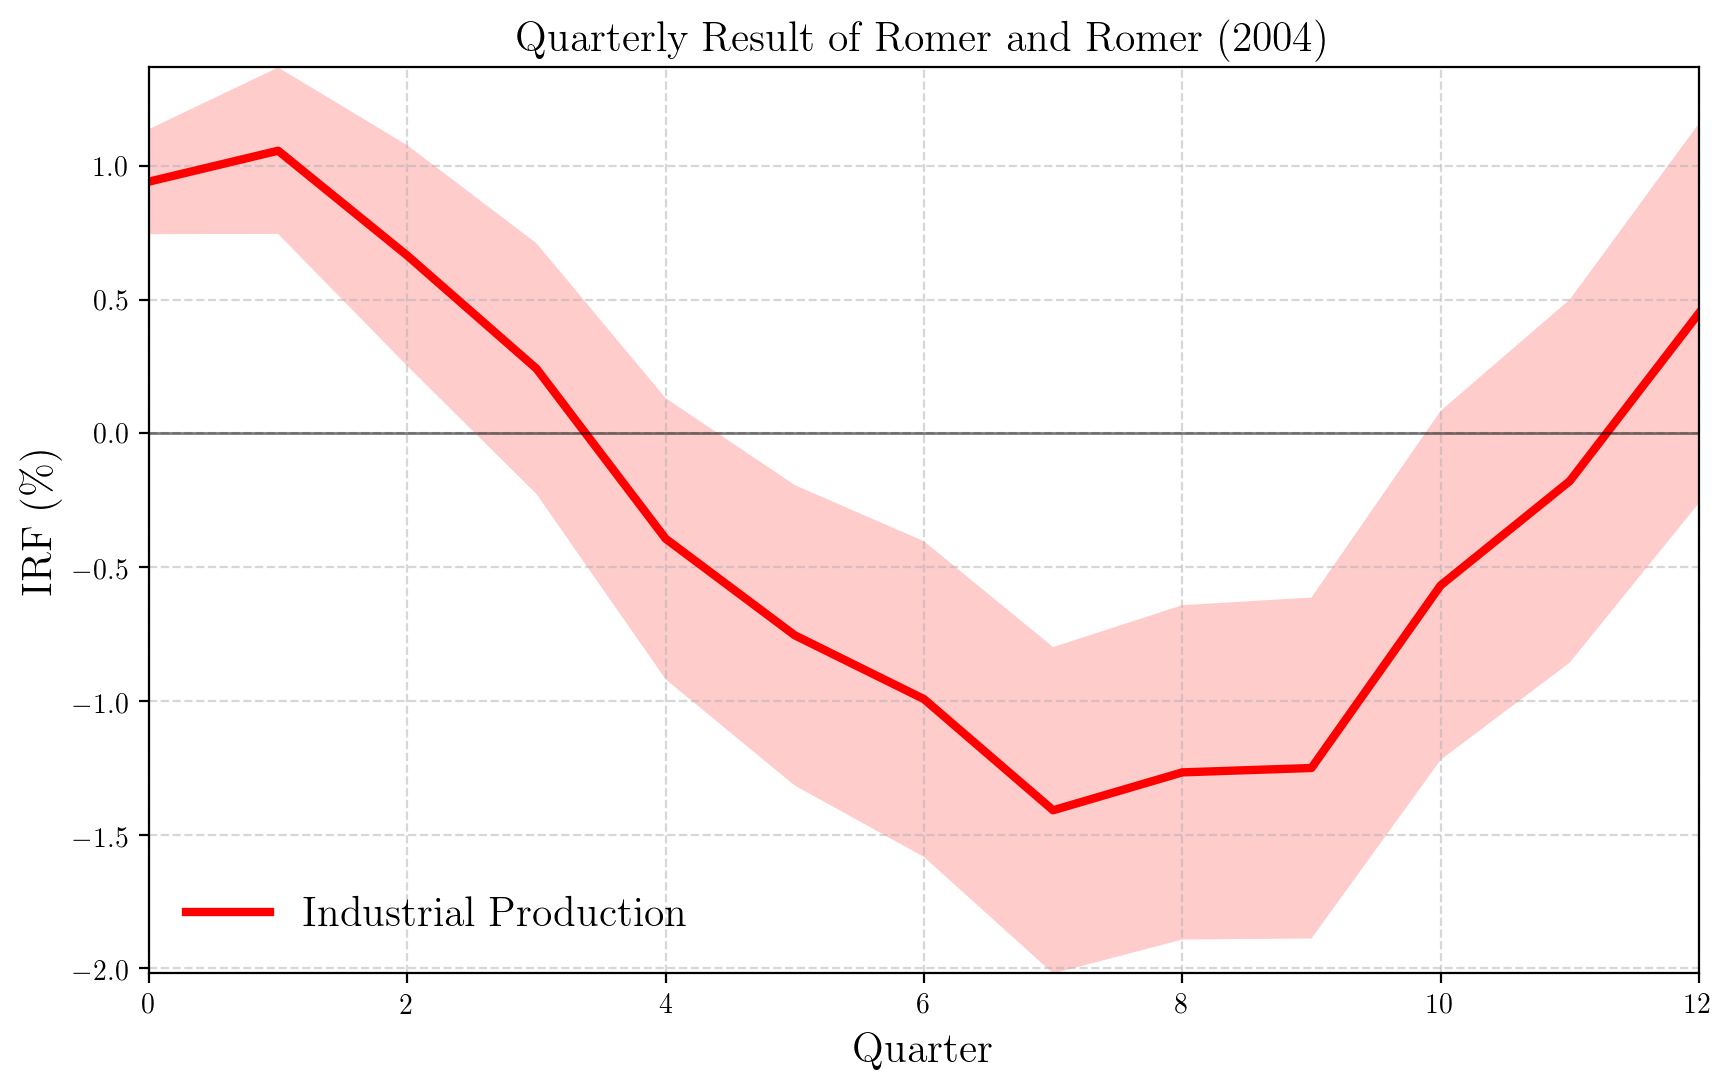

In [3]:
### Generate the Romer & Romer (2004) Result-Quarterly, Longer Sample
## Setup
LagMin_Shock    =   0
LagNum_Shock    =   3*4

LagNum_Res      =   2*4

StartEndDate    =   [datetime.datetime(1970,1,1),datetime.datetime(2007,12,31)]
## Regression
IRF,STD,RegResult   =   RomerRomerReg(Sample, \
                                      'IndProd','resid_full','Quarter', \
                                      LagNum_Res,LagNum_Shock,LagMin_Shock, \
                                      StartEndIndex=StartEndDate, \
                                      ResType='Log-Diff',IRFType='Accumulated')
## Generate the IRF Plots
IRF_Plot(IRF*100,STD*100,['IndProd'],['Industrial Production'], \
         ['solid'],['red'], \
         FileName='..\\results\\RomerRomer2004\\RR2004_Quarterly_LongSample.pdf', \
         Title='Quarterly Result of Romer and Romer (2004)', \
         XLabel='Quarter',YLabel='IRF (\%)')

Conclusion: the original result is robust to the change of sample period.

# Extension: Different Response Variables from NIPA

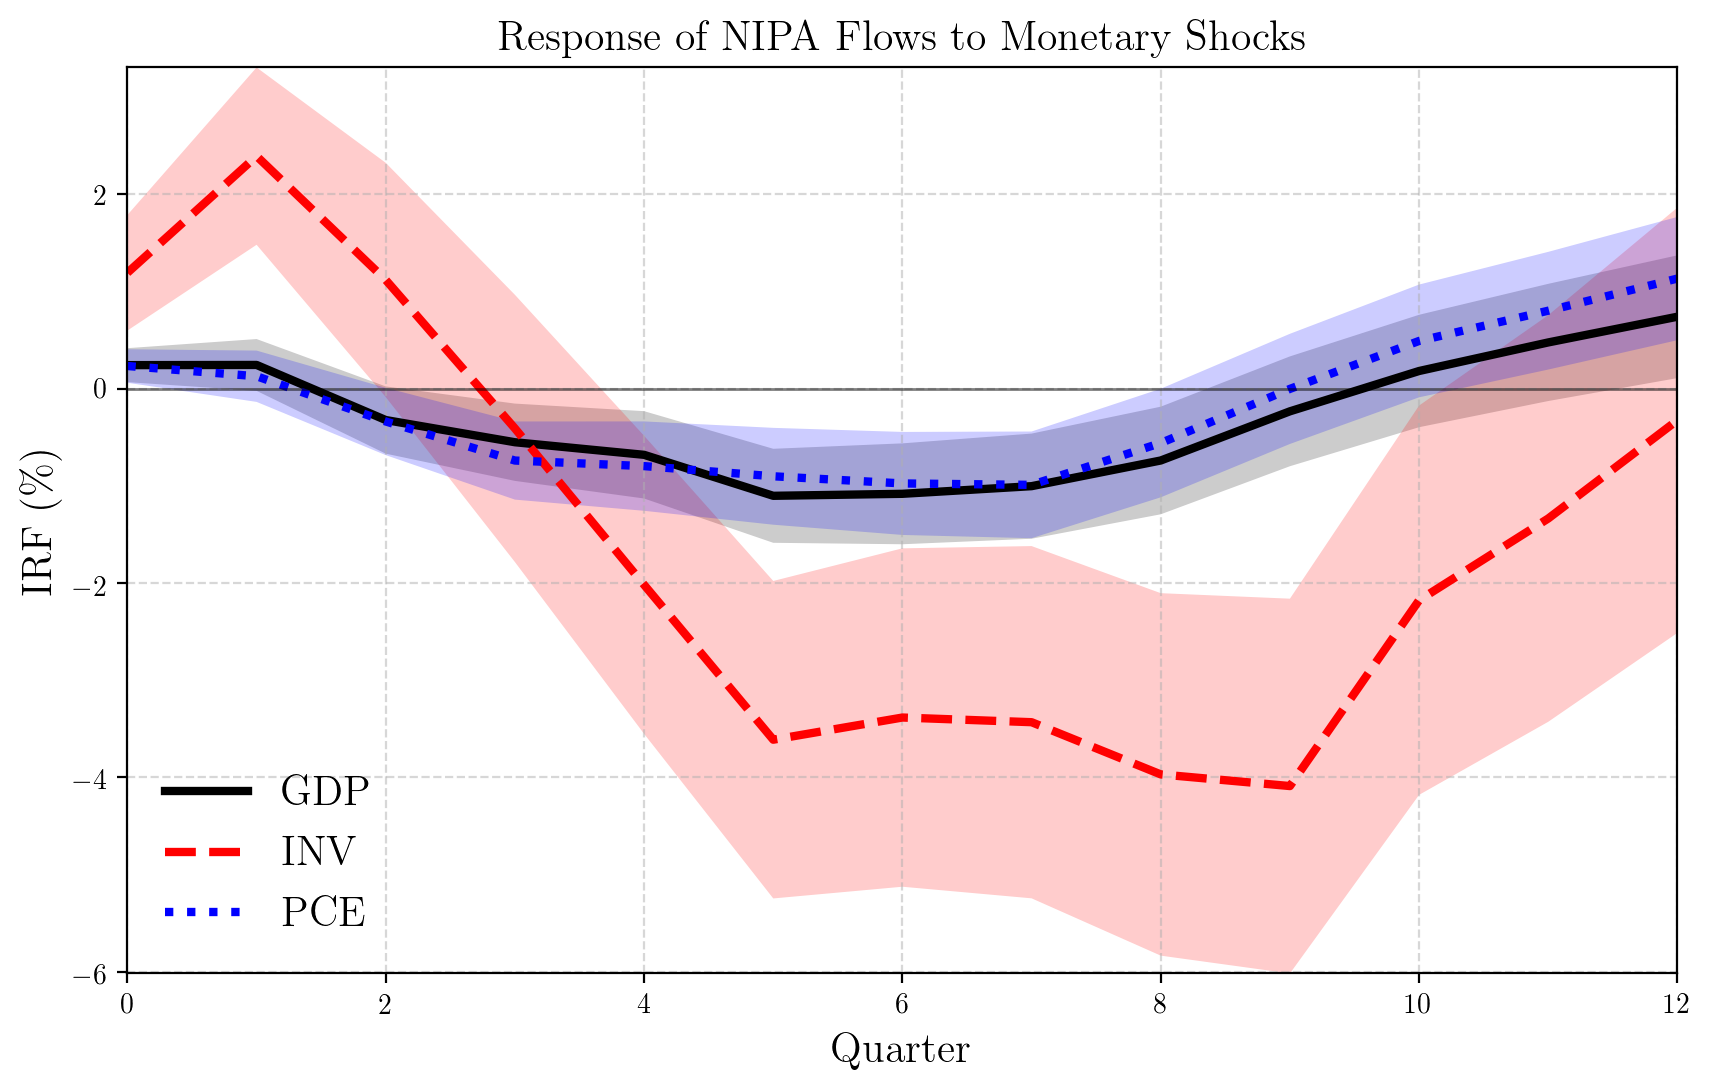

In [6]:
#%% Extend Romer and Romer Result-Quarterly Result to Different Response Variables

### Construct the Data Set for Regression
## NIPA Data
Sample      =   pickle.load(open("..\\temp\\FoF\\NIPA_Q.p",'rb'))

# Quarterly Monetary Shock Data from Wieland
RRShock     =   pd.read_stata("..\\datasets\\MonetaryShocks_FromWieland"+
                              "\\RR_monetary_shock_quarterly.dta")
RRShock.set_index('date',inplace=True)
# Sample for Regression 
Sample      =   Sample.merge(right=RRShock,how='outer', \
                             left_index=True,right_index=True)
Sample.sort_index(inplace=True)
    
# Set Monetary Shocks before March, 1969 to 0
Sample.loc[Sample.index<datetime.datetime(1969,3,1), \
           ['resid','resid_romer','resid_full']]    =   0
# Generate Year and Month ID
Sample['Year']          =   Sample.index.map(lambda x: x.year) 
Sample['Quarter']       =   Sample.index.map(lambda x: x.quarter)

### Generate the Romer & Romer (2004) Extension Result-Quarterly, Longer Sample
## Setup
LagMin_Shock    =   0
LagNum_Shock    =   3*4

LagNum_Res      =   2*4

StartEndDate    =   [datetime.datetime(1970,1,1),datetime.datetime(2007,12,31)]
## Regression
ResVarList      =   ['GDP','PCE','INV']
for ii in range(len(ResVarList)):
    ResVar          =   ResVarList[ii]
    TempIRF,TempSTD,TempRegResult   \
                    =   RomerRomerReg(Sample, \
                                      ResVar,'resid_full','Quarter', \
                                      LagNum_Res,LagNum_Shock,LagMin_Shock, \
                                      StartEndIndex=StartEndDate, \
                                      ResType='Log-Diff',IRFType='Accumulated')
    if ii==0:
        IRF             =   TempIRF
        STD             =   TempSTD
    else:
        IRF             =   IRF.join(TempIRF)
        STD             =   STD.join(TempSTD)

## Generate the IRF Plots
IRF_Plot(IRF*100,STD*100, \
         ['GDP','INV','PCE'],['GDP','INV','PCE'], \
         ['solid','dashed','dotted'],['black','red','blue'], \
         FileName='..\\results\\RomerRomer2004\\NIPAFlows_Quarterly_LongSample.pdf', \
         Title='Response of NIPA Flows to Monetary Shocks', \
         XLabel='Quarter',YLabel='IRF (\%)')

Conclusion: The responses of real GDP and Personal Consumption Expenditure are perfectly aligned with the prediction of the theory. The response of real Private Gross Investment is basically aligned with theoretical predication. Given the initial positive response of industrial production shown in the baseline Romer and Romer result, this trajectory of response is not very surprising. 